In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
sal_df=pd.read_csv('Salaries.csv')

In [3]:
sal_df.columns

Index(['Unnamed: 0', 'rank', 'discipline', 'yrs.since.phd', 'yrs.service',
       'sex', 'salary'],
      dtype='object')

In [8]:
sal_df=sal_df.drop(columns=['Unnamed: 0'],axis=1)

In [9]:
sal_df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

Test Size 0.3: MSE = 536520543.7312116, R² = 0.3316024340702002


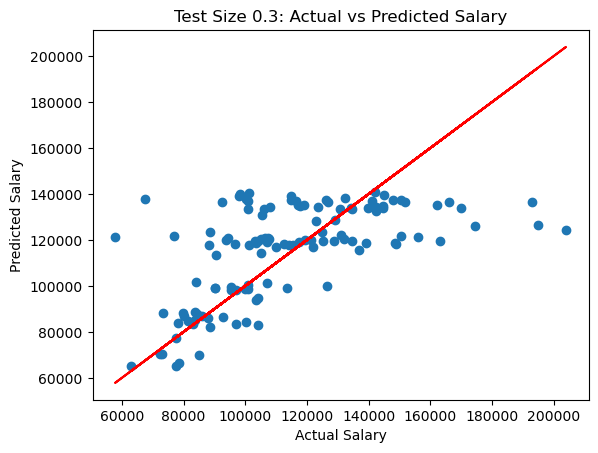

Test Size 0.4: MSE = 521050700.6133962, R² = 0.3518966925899282


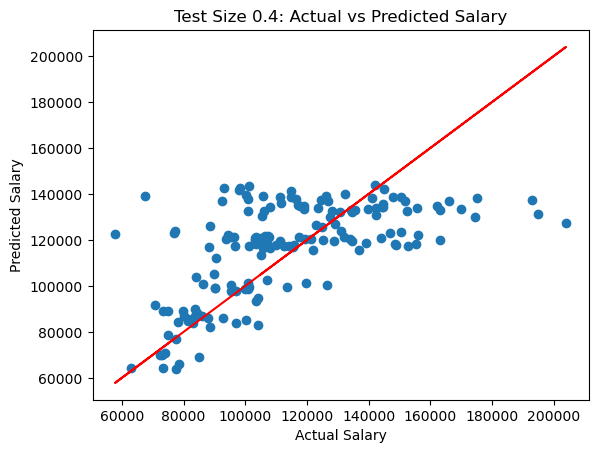

Test Size 0.5: MSE = 528776976.2387056, R² = 0.3719379192364528


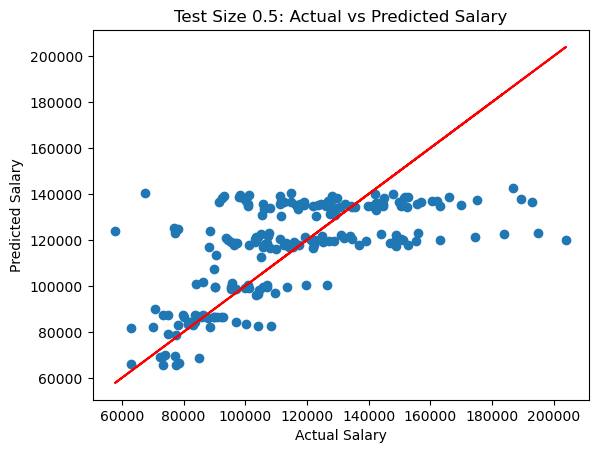

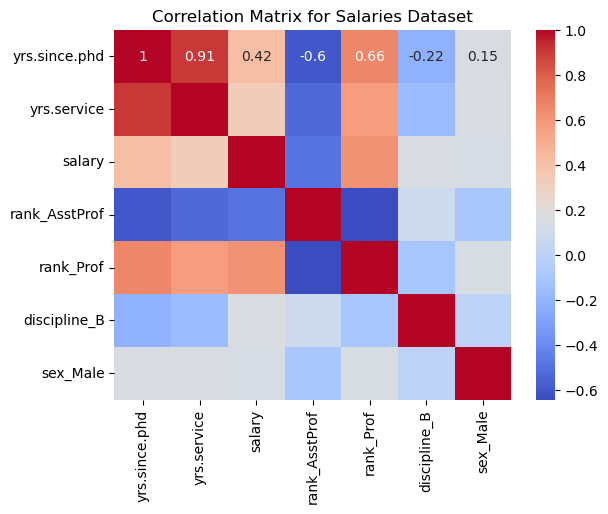

Results have been saved to 'salaries_mlr_all_in_one.xlsx'


In [12]:


# Load the dataset


# Convert categorical variables to dummy variables
sal_df = pd.get_dummies(sal_df, drop_first=True)

# Independent and dependent variables
X = sal_df.drop('salary', axis=1)
y = sal_df['salary']

# Initialize lists to store results for Excel export
test_size_list = []
mse_list = []
r2_list = []
intercept_list = []
coefficients_list = []
actual_list = []
predicted_list = []
test_size_col = []

# Splitting the data into train and test sets with different test sizes
test_sizes = [0.3, 0.4, 0.5]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Model training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate MSE and R² score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store test size, MSE, R², intercept, and coefficients for each test size
    test_size_list.append(test_size)
    mse_list.append(mse)
    r2_list.append(r2)
    intercept_list.append(model.intercept_)
    coefficients_list.append(list(model.coef_))

    # Append actual and predicted values
    actual_list.extend(y_test)
    predicted_list.extend(y_pred)
    test_size_col.extend([test_size] * len(y_test))

    # Print MSE and R² for each test size
    print(f"Test Size {test_size}: MSE = {mse}, R² = {r2}")

    # Scatter plot and regression line
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red')
    plt.xlabel('Actual Salary')
    plt.ylabel('Predicted Salary')
    plt.title(f"Test Size {test_size}: Actual vs Predicted Salary")
    plt.show()

# Heatmap of correlation
corr = sal_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Salaries Dataset")
plt.show()

# Prepare a single DataFrame for Excel export
results_df = pd.DataFrame({
    'Test Size': test_size_col,
    'Actual Salary': actual_list,
    'Predicted Salary': predicted_list,
})

# Add test size-wise summary for intercept and coefficients
summary_df = pd.DataFrame({
    'Test Size': test_size_list,
    'MSE': mse_list,
    'R² Score': r2_list,
    'Intercept': intercept_list,
    'Coefficients': coefficients_list
})

# Combine summary and actual-predicted data in one sheet by merging
results_combined = pd.merge(results_df, summary_df, on='Test Size', how='left')

# Write to Excel
results_combined.to_excel('salaries_mlr_all_in_one.xlsx', index=False)

print("Results have been saved to 'salaries_mlr_all_in_one.xlsx'")


In [24]:
insurance = pd.read_csv("insurance.csv")
insurance.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [25]:
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [31]:
lm=LabelEncoder()
insurance['sex'] = lm.fit_transform(insurance['sex'])
insurance['smoker'] = lm.fit_transform(insurance['smoker'])
insurance['region'] = lm.fit_transform(insurance['region'])

# Independent and dependent variables
X = insurance.drop('charges', axis=1)
y = insurance['charges']


In [33]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


Test Size 0.3: MSE = 33805466.89868861, R² = 0.7694415927057694


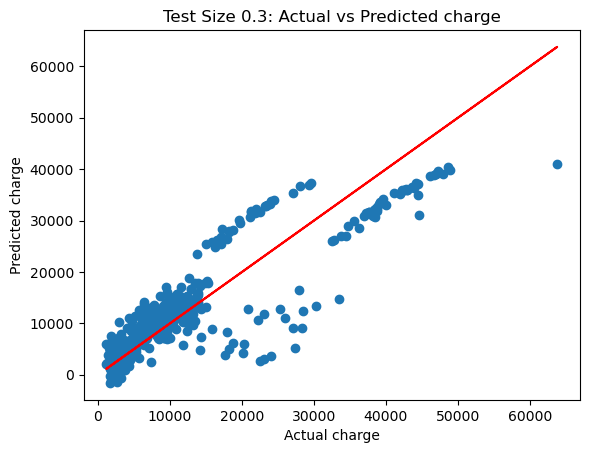

Test Size 0.4: MSE = 35513501.260346785, R² = 0.7619016217522223


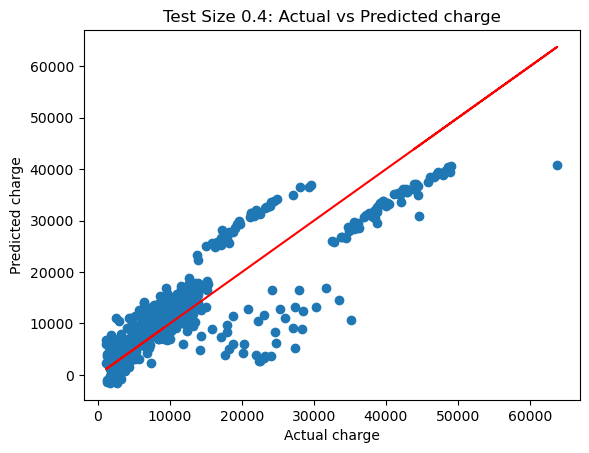

Test Size 0.5: MSE = 35238625.04205499, R² = 0.7744249495380054


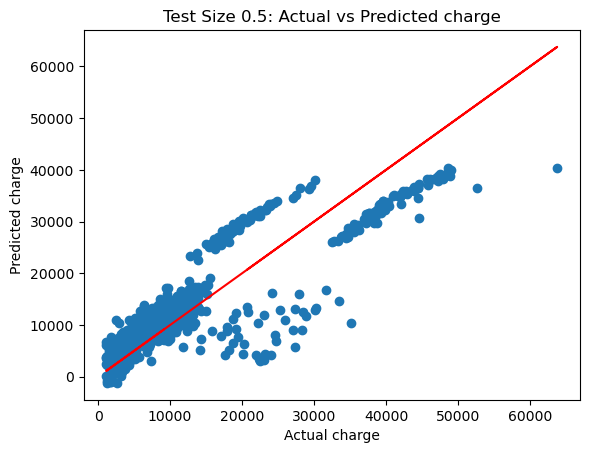

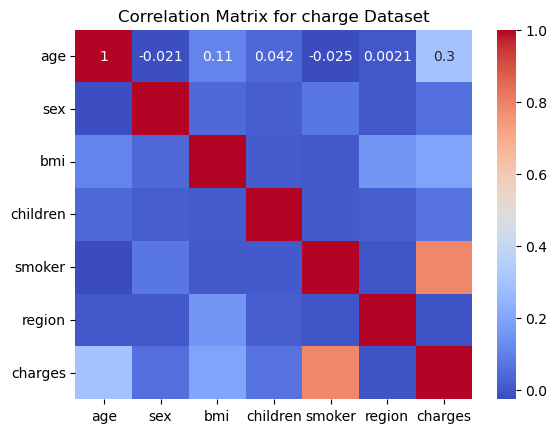

Results have been saved to 'charges_mlr_all_in_one.xlsx'


In [34]:
test_size_list = []
mse_list = []
r2_list = []
intercept_list = []
coefficients_list = []
actual_list = []
predicted_list = []
test_size_col = []

# Splitting the data into train and test sets with different test sizes
test_sizes = [0.3, 0.4, 0.5]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Model training
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate MSE and R² score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store test size, MSE, R², intercept, and coefficients for each test size
    test_size_list.append(test_size)
    mse_list.append(mse)
    r2_list.append(r2)
    intercept_list.append(model.intercept_)
    coefficients_list.append(list(model.coef_))

    # Append actual and predicted values
    actual_list.extend(y_test)
    predicted_list.extend(y_pred)
    test_size_col.extend([test_size] * len(y_test))

    # Print MSE and R² for each test size
    print(f"Test Size {test_size}: MSE = {mse}, R² = {r2}")

    # Scatter plot and regression line
    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color='red')
    plt.xlabel('Actual charge')
    plt.ylabel('Predicted charge')
    plt.title(f"Test Size {test_size}: Actual vs Predicted charge")
    plt.show()

# Heatmap of correlation
corr = insurance.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for charge Dataset")
plt.show()

# Prepare a single DataFrame for Excel export
results_df = pd.DataFrame({
    'Test Size': test_size_col,
    'Actual Salary': actual_list,
    'Predicted Salary': predicted_list,
})

# Add test size-wise summary for intercept and coefficients
summary_df = pd.DataFrame({
    'Test Size': test_size_list,
    'MSE': mse_list,
    'R² Score': r2_list,
    'Intercept': intercept_list,
    'Coefficients': coefficients_list
})

# Combine summary and actual-predicted data in one sheet by merging
results_combined = pd.merge(results_df, summary_df, on='Test Size', how='left')

# Write to Excel
results_combined.to_excel('charges_mlr_all_in_one.xlsx', index=False)

print("Results have been saved to 'charges_mlr_all_in_one.xlsx'")

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Gradient Descent for Multiple Linear Regression
def gradient_descent_mlr(X, y, lr=0.01, epochs=1000):
    n = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []
    theta_history = []
    
    for epoch in range(epochs):
        y_pred = X.dot(theta)
        error = y_pred - y
        cost = (1/(2*n)) * np.sum(error ** 2)
        theta -= (lr/n) * X.T.dot(error)
        
        # Store cost and theta history
        cost_history.append(cost)
        theta_history.append(theta.copy())

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")
    
    return theta, cost_history, theta_history

# Example for Salaries Dataset
# Load the salaries dataset
sal_df = pd.read_csv('salaries.csv')

# Convert categorical variables into dummy/indicator variables
sal_df = pd.get_dummies(sal_df, drop_first=True)

# Separate independent (X) and dependent variables (y)
X = sal_df.drop('salary', axis=1).values
y = sal_df['salary'].values

# Feature scaling (optional but recommended for gradient descent)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Adding intercept (bias term)
X_b = np.c_[np.ones((len(X), 1)), X]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.3, random_state=42)

# Running Gradient Descent
theta_final, cost_history, theta_history = gradient_descent_mlr(X_train, y_train)

# Saving iterations to Excel
iterations_df = pd.DataFrame(theta_history, columns=['theta_' + str(i) for i in range(X_train.shape[1])])
iterations_df['cost'] = cost_history
iterations_df.to_excel('salaries_mlr_iterations.xlsx', index=False)

print(f"Final parameters: {theta_final}")


Epoch 0: Cost = 6962177333.15343
Epoch 100: Cost = 1141874802.4439578
Epoch 200: Cost = 369332010.643936
Epoch 300: Cost = 260556306.73727992
Epoch 400: Cost = 244000890.72103006
Epoch 500: Cost = 241094190.06615457
Epoch 600: Cost = 240445928.95629522
Epoch 700: Cost = 240244544.83399066
Epoch 800: Cost = 240155882.04598218
Epoch 900: Cost = 240104534.7330574
Final parameters: [114205.22163047   3587.3545824    2924.12904645  -1750.31628477
  -4635.34652438  15740.63658439   9536.57104165   1322.45544314]
